Include useful packages:

In [95]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

The data points can be stored in numpy arrays

In [96]:
xvalues = np.array([50.0,60.0,70.0,72.0,74.0,76.0,78.0,80.0,90.0,100.0])
yvalues = np.array([7000,7000,7000,7300,9540, 12320, 13600, 14000,14000,14000])
yerrors = np.array(yvalues.size*[100])

ax = np.arange(50,100,0.1) # extra x axis from 50 to 100 in small steps for drawing later
# print(ax)

Create a plot with the data defined above

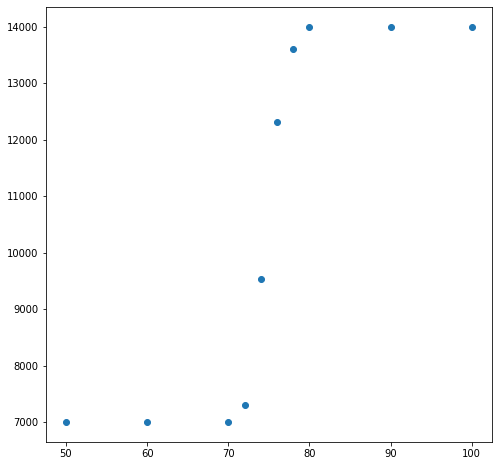

In [97]:
# plt.rcParams["figure.figsize"] = (8,8)
plt.plot(xvalues,yvalues,"o")
plt.show()

Lets define a function do parametrise the data

In [98]:
def fermi(x,A,B,C):
    """A function with the shape of a fermi-dirac distribution"""
    """Todo: Add proper variable names"""
    y = ( A - ( A/ ( np.exp( (x-B) /C ) +2 ) ) )
    return y

We use the `curve_fit` function from the scipy optimize module to fit our data.

In [99]:
startValues = [14000.,75.,3.]
parameters, covariance = curve_fit(fermi, xvalues, yvalues, startValues)
# parameters, covariance = curve_fit(fermi, xvalues, yvalues, startValues, yerrors, True)

In [100]:
fit_A = parameters[0]
fit_B = parameters[1]
fit_C = parameters[2]
# was:
# fit_A = parameters[0]
# fit_C = parameters[1]
# fit_B = parameters[2]

print("fit_A: ", fit_A)
print("fit_B: ", fit_B)
print("fit_C: ", fit_C)
fit_y = fermi(ax,fit_A,fit_B,fit_C)
print("cov: \n", covariance)

fit_A:  13960.890273869798
fit_B:  73.93285020108559
fit_C:  1.0692251340333283
cov: 
 [[ 2.91838770e+03  1.65047173e+00  5.40222706e-01]
 [ 1.65047173e+00  5.34783495e-03 -1.35114371e-03]
 [ 5.40222706e-01 -1.35114371e-03  2.58534591e-03]]


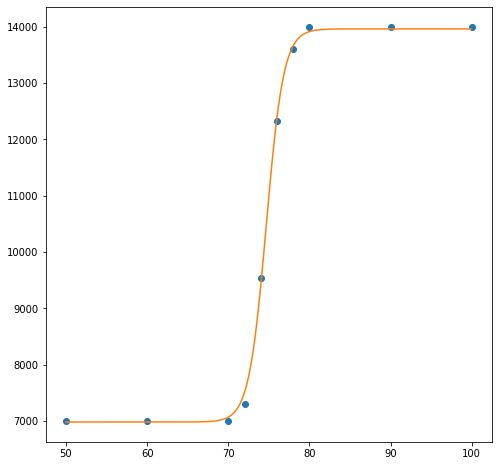

In [101]:
plt.plot(xvalues,yvalues,"o")
# plt.plot(xvalues,fit_y,"-")
plt.plot(ax,fit_y,"-")
plt.show()